#Modelo de neurônio de Hodgkin Huxley (1952)

Núcleo de Inteligência Artificial e Computação em Educação - FMABC \\
Prof. Dr. Jorge de O Echeimberg

Qual a duração da simulação (ms)?200
Qual o ponencial de estímulo (mV)?2
Qual o instante inicial dos estímulos (ms)?1
Qual o instante final dos estímulos (ms)?10


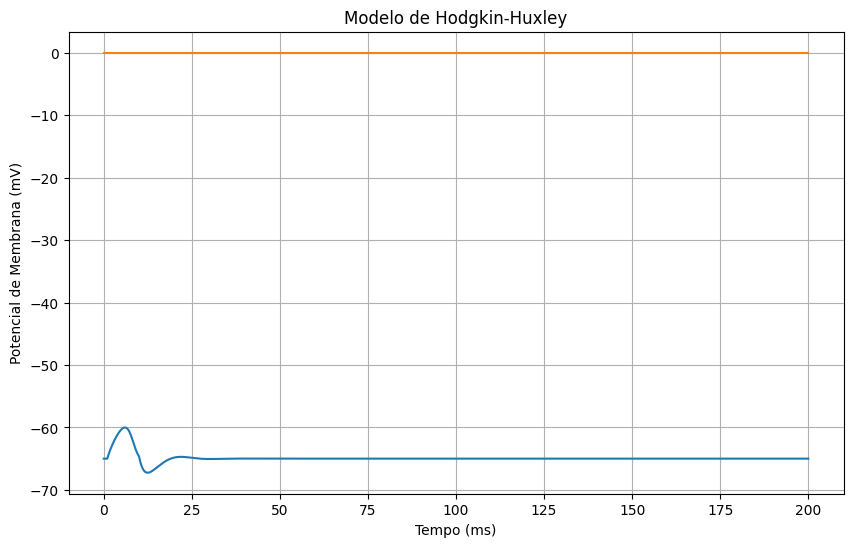

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo constantes
C_m = 1.0  # Capacitância da membrana, em uF/cm^2
g_Na = 120.0  # Condutância máxima para Na+ em mS/cm^2
g_K = 36.0  # Condutância máxima para K+ em mS/cm^2
g_L = 0.3  # Condutância de vazamento em mS/cm^2
E_Na = 50.0  # Potencial de reversão para Na+ em mV
E_K = -77.0  # Potencial de reversão para K+ em mV
E_L = -54.387  # Potencial de reversão de vazamento em mV

# Funções de gate
def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))

# Função de estímulo
def stimulus(t,est,inicio, fim):
    return est if inicio <= t <= fim else 0

# Simulação do modelo
def simulate_HH(T, dt, est,inicio, fim):
    t = np.arange(0, T, dt)
    V = np.zeros(len(t))
    m = np.zeros(len(t))
    h = np.zeros(len(t))
    n = np.zeros(len(t))

    # Condições iniciais
    V[0] = -65
    m[0] = alpha_m(V[0]) / (alpha_m(V[0]) + beta_m(V[0]))
    h[0] = alpha_h(V[0]) / (alpha_h(V[0]) + beta_h(V[0]))
    n[0] = alpha_n(V[0]) / (alpha_n(V[0]) + beta_n(V[0]))

    for i in range(1, len(t)):
        I_Na = g_Na * (m[i-1]**3) * h[i-1] * (V[i-1] - E_Na)
        I_K = g_K * (n[i-1]**4) * (V[i-1] - E_K)
        I_L = g_L * (V[i-1] - E_L)

        I_ext = stimulus(t[i-1], est, inicio, fim)

        V[i] = V[i-1] + dt * (I_ext - I_Na - I_K - I_L) / C_m
        m[i] = m[i-1] + dt * (alpha_m(V[i-1]) * (1 - m[i-1]) - beta_m(V[i-1]) * m[i-1])
        h[i] = h[i-1] + dt * (alpha_h(V[i-1]) * (1 - h[i-1]) - beta_h(V[i-1]) * h[i-1])
        n[i] = n[i-1] + dt * (alpha_n(V[i-1]) * (1 - n[i-1]) - beta_n(V[i-1]) * n[i-1])

    return t, V

# Executar simulação
T = int(input("Qual a duração da simulação (ms)?"))  # Duração da simulação em ms
est = float(input("Qual o ponencial de estímulo (mV)?")) # potencial de estimula do pontencial de ação
inicio = int(input("Qual o instante inicial dos estímulos (ms)?")) # instante de inicio dos estimulos
fim = int(input("Qual o instante final dos estímulos (ms)?")) # instante de final dos estimulos

dt = 0.01  # Passo de tempo em ms
t, V = simulate_HH(T, dt,est,inicio,fim)

x = np.linspace(0,T,T)
y = [0 for i in range(0,T,1)]

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(t, V)
plt.plot(x, y)
plt.title('Modelo de Hodgkin-Huxley')
plt.xlabel('Tempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.grid(True)
plt.show()
